In [1]:
# Nhập thư viện
import numpy as np
import pandas as pd

In [2]:
# Load dữ liệu
def loadExcel(filename) -> pd.DataFrame:
    '''Code here'''

In [3]:
# tạo tập train test (chia data_train (gộp X_train và y_train) và X_test và y_test)
def splitTrainTest(data, target, ratio = 0.25): # data --> frame
    from sklearn.model_selection import train_test_split
    data_X = data.drop([target], axis = 1)
    data_y = data[[target]]
    '''Code here'''
    return data_train, X_test, y_test # đều là dạng frame

In [4]:
# hàm tính trung bình của từng lớp trong biến target
def mean_class(data_train, target): # tên cột target, data_train là dạng pandas
    df_group = data_train.groupby(by = target).mean() # tất cả các cột đều dạng số, --> frame # sắp xếp theo bảng chữ cái tăng dần(mặc định)
    return df_group # kết quả là dataframe

In [5]:
# hàm dự đoán dùng khoảng cách euclid
def target_pred(data_group, data_test): # data_test ở dạng mảng, data_group là đã đem tính trung bình các lớp(là df_group)
    dict_ = dict()
    for index, value in enumerate(data_group.values):
        result = np.sqrt(np.sum(((data_test - value)**2), axis = 1)) # khoảng cách euclid
        if index in dict_:
            dict_.append(result)
        else:
            dict_[index] = result # Lưu ý chỗ này không phải là [result] vì result là dạng mảng, nếu thêm vào vậy thì nó chỉ có một phần tử.
    # dict_ kết quả dạng {0: [2.0], 1: [1.0540925533894596]}
    '''Code here'''
    return df.idxmin(axis = 1) # hàm này tìm cột chưá giá trị nhỏ nhất
    
##### Có thể phát triển: cho thêm một tham số metric vào hàm, nếu là euclid thì dùng khoảng cách euclid, manhattan thì dùng khoảng cách manhattan.

In [6]:
### Demo bằng ví dụ Iris

In [7]:
data = loadExcel('Iris.xls')
data

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


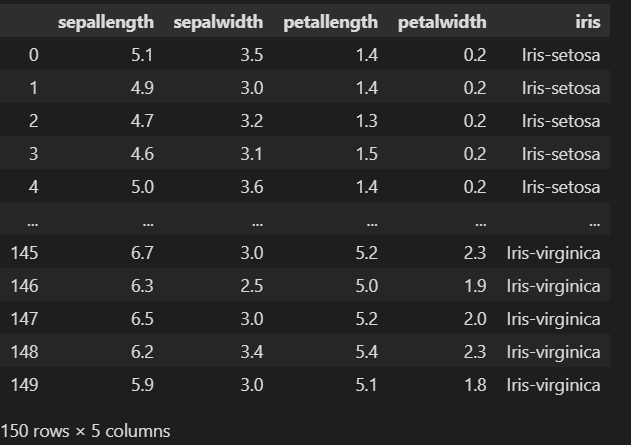

In [8]:
data_train, X_test, y_test = splitTrainTest(data, 'iris', ratio = 0.3)
print(data_train)
print(X_test)
print(y_test)

     sepallength  sepalwidth  petallength  petalwidth             iris
118          7.7         2.6          6.9         2.3   Iris-virginica
18           5.7         3.8          1.7         0.3      Iris-setosa
4            5.0         3.6          1.4         0.2      Iris-setosa
45           4.8         3.0          1.4         0.3      Iris-setosa
59           5.2         2.7          3.9         1.4  Iris-versicolor
..           ...         ...          ...         ...              ...
133          6.3         2.8          5.1         1.5   Iris-virginica
137          6.4         3.1          5.5         1.8   Iris-virginica
72           6.3         2.5          4.9         1.5  Iris-versicolor
140          6.7         3.1          5.6         2.4   Iris-virginica
37           4.9         3.1          1.5         0.1      Iris-setosa

[105 rows x 5 columns]
     sepallength  sepalwidth  petallength  petalwidth
14           5.8         4.0          1.2         0.2
98           5.1

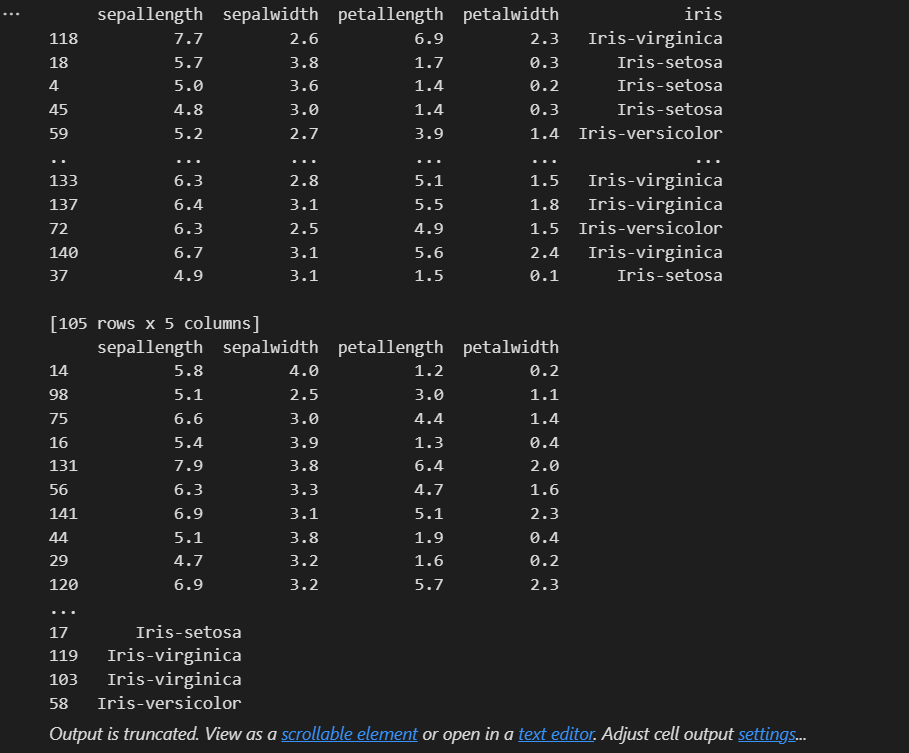

In [9]:
df_group = mean_class(data_train, 'iris')
df_group

,sepallength,sepalwidth,petallength,petalwidth
iris,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


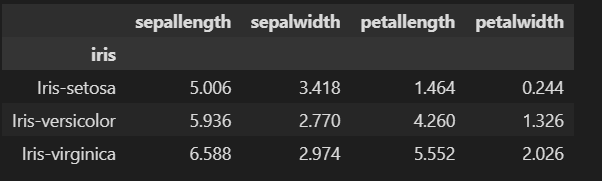

In [10]:
#  tính khoảng cách và trả về kết quả lớp có khoảng cách gần nhất
df1 = pd.DataFrame(target_pred(df_group, X_test.values), columns = ['Predict'])
df1

,Predict
0,Iris-setosa
1,Iris-versicolor
2,Iris-versicolor
3,Iris-setosa
4,Iris-virginica
5,Iris-versicolor
6,Iris-virginica
7,Iris-setosa
8,Iris-setosa
9,Iris-virginica


In [14]:
# set index y_test để nối 2 frame
y_test.index = range(0, len(y_test))
y_test.columns = ['Actual']
y_test

,Actual
0,Iris-setosa
1,Iris-versicolor
2,Iris-versicolor
3,Iris-setosa
4,Iris-virginica
5,Iris-versicolor
6,Iris-virginica
7,Iris-setosa
8,Iris-setosa
9,Iris-virginica


In [15]:
df2 = pd.DataFrame(y_test)
df2

,Actual
0,Iris-setosa
1,Iris-versicolor
2,Iris-versicolor
3,Iris-setosa
4,Iris-virginica
5,Iris-versicolor
6,Iris-virginica
7,Iris-setosa
8,Iris-setosa
9,Iris-virginica


In [16]:
pd.concat([df1, df2],axis = 1)

,Predict,Actual
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


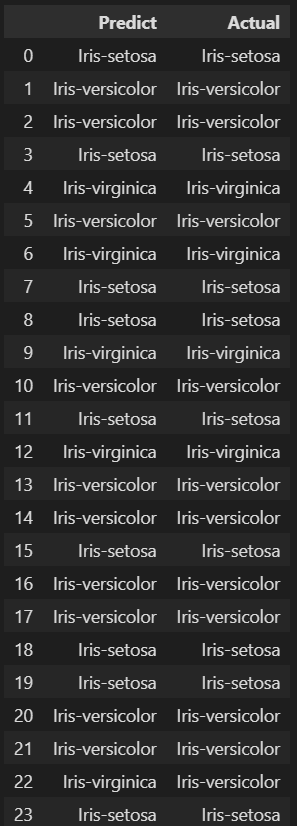